In [ ]:
import math 
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data_sets/Life expectancy.csv')

In [ ]:
df.head(10)

,Entity,Year,Life expectancy
0,Australia,1802,34.049999
1,Australia,1803,34.049999
2,Australia,1804,34.049999
3,Australia,1805,34.049999
4,Australia,1806,34.049999
5,Australia,1807,34.049999
6,Australia,1808,34.049999
7,Australia,1809,34.049999
8,Australia,1810,34.049999
9,Australia,1811,34.049999


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3253 entries, 0 to 3252
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Entity           3253 non-null   object 
 1   Year             3253 non-null   int64  
 2   Life expectancy  3253 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 76.4+ KB


In [ ]:
df['Entity'].unique()

array(['Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany',
       'India', 'Italy', 'Japan', 'Mexico', 'Russia', 'Spain',
       'Switzerland', 'United Kingdom', 'United States'], dtype=object)

In [ ]:
df['Year'].min()

1800

In [ ]:
df['Year'].max()

2016

In [ ]:
mexico = df[df['Entity'] == 'Mexico'].reset_index(drop=True)
mexico.head(20)

In [ ]:
mexico.tail()

,Entity,Year,Life expectancy
212,Mexico,2012,75.879997
213,Mexico,2013,75.790001
214,Mexico,2014,75.900002
215,Mexico,2015,76.190002
216,Mexico,2016,76.379997


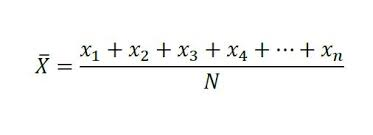

In [ ]:
def mean(sample: list):
  """Functions thtat receives a list of numbers and returns the mean."""

  n = len(sample)
  sum_x = sum(sample)
  return sum_x / n

In [ ]:
media = mean(mexico['Life expectancy'])
media

40.83562865437788

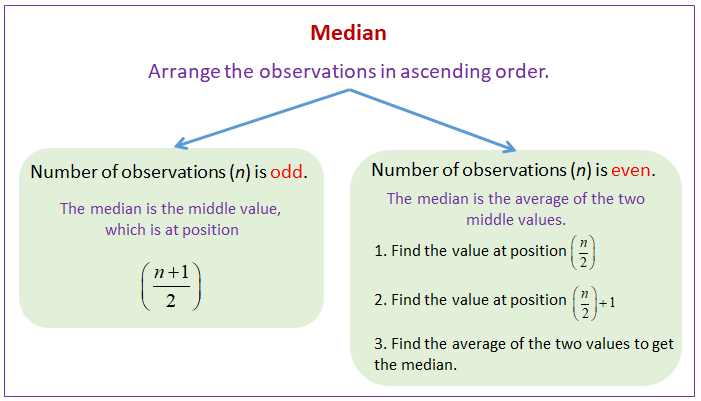

In [ ]:
def median(sample: list):
  """Function that calculates the median."""

  n = len(sample)
  i = n//2

  if n % 2 == 1:
    return sorted(sample)[i]
  else:
    return sum(sorted(sample)[i-1: i+1])/2


In [ ]:
median(mexico['Life expectancy'])


28.68

In [ ]:
np.median(mexico['Life expectancy'])

28.68

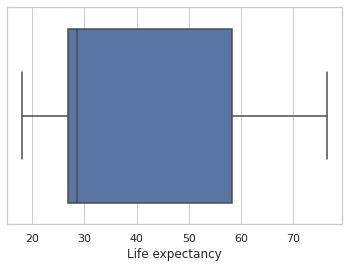

In [ ]:
sns.set_theme(style='whitegrid')
ax = sns.boxplot(x=mexico['Life expectancy'])

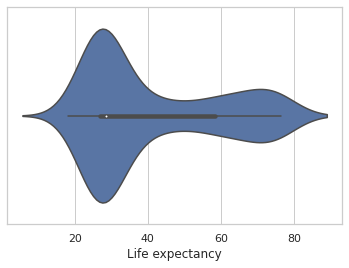

In [ ]:
sns.violinplot(x=mexico['Life expectancy'])

### Varianza

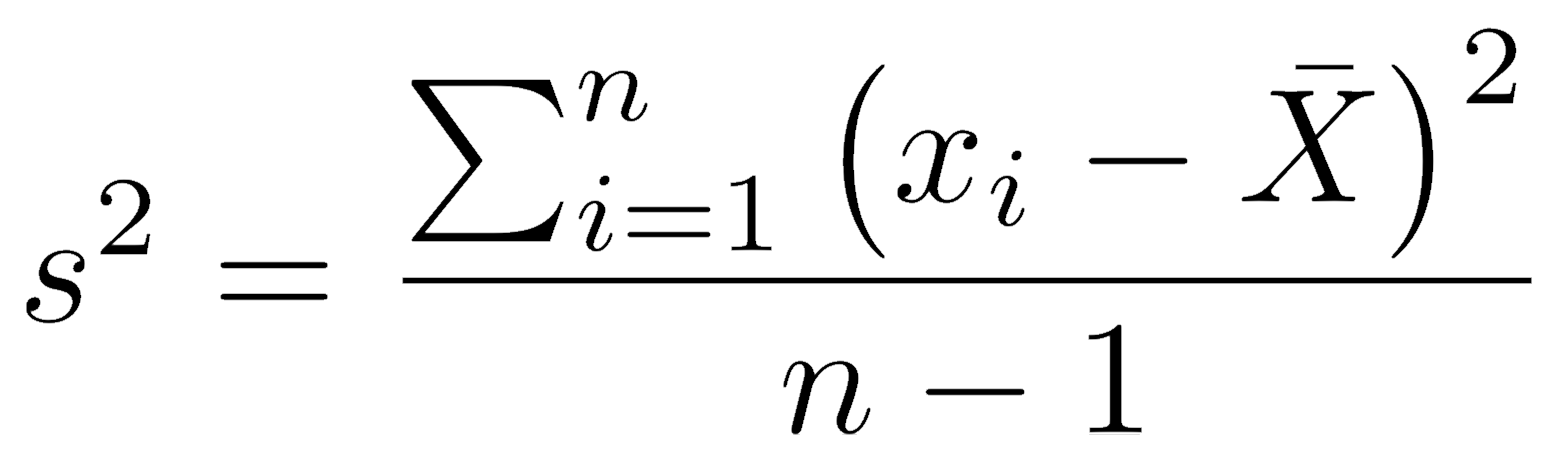

In [ ]:
def variance(sample: list):
  """Returns the variance"""

  n = len(sample)
  mean = sum(sample)/n
  var = sum((i - mean)**2 for i in sample) / (n - 1)
  return var


In [ ]:
variance(mexico["Life expectancy"])

333.9730319602118

In [ ]:
np.var(mexico['Life expectancy'], ddof=1)

333.9730319602118

In [ ]:
mexico_2000 = mexico[mexico['Year'] > 1999].reset_index(drop=True)
mexico_2000

,Entity,Year,Life expectancy
0,Mexico,2000,74.610001
1,Mexico,2001,74.870003
2,Mexico,2002,74.889999
3,Mexico,2003,74.930000
4,Mexico,2004,75.220001
5,Mexico,2005,75.209999
6,Mexico,2006,75.459999
7,Mexico,2007,75.660004
8,Mexico,2008,75.440002
9,Mexico,2009,75.349998


In [ ]:
avg = np.mean(mexico_2000['Life expectancy'])
avg

75.46705929411766

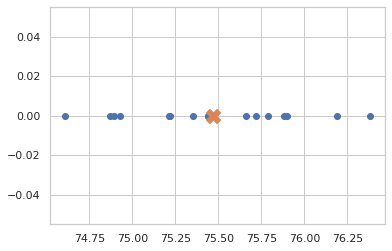

In [ ]:
fig, ax = plt.subplots()

plt.scatter(mexico_2000['Life expectancy'], y=np.zeros(len(mexico_2000['Life expectancy'])))
plt.scatter(avg, 0, marker='X', s=200);

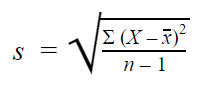

In [ ]:
np.std(mexico_2000['Life expectancy'])

0.47119051025982545

### Comparacion entre dos muestras de una misma población 

In [ ]:
mexico_80_99 = mexico[(mexico['Year']>1982) & (mexico['Year']< 2000)].reset_index(drop=True)
mexico_80_99

,Entity,Year,Life expectancy
0,Mexico,1983,67.950996
1,Mexico,1984,68.387001
2,Mexico,1985,68.811996
3,Mexico,1986,69.227997
4,Mexico,1987,69.637001
5,Mexico,1988,70.040001
6,Mexico,1989,70.440002
7,Mexico,1990,71.510002
8,Mexico,1991,71.879997
9,Mexico,1992,72.089996


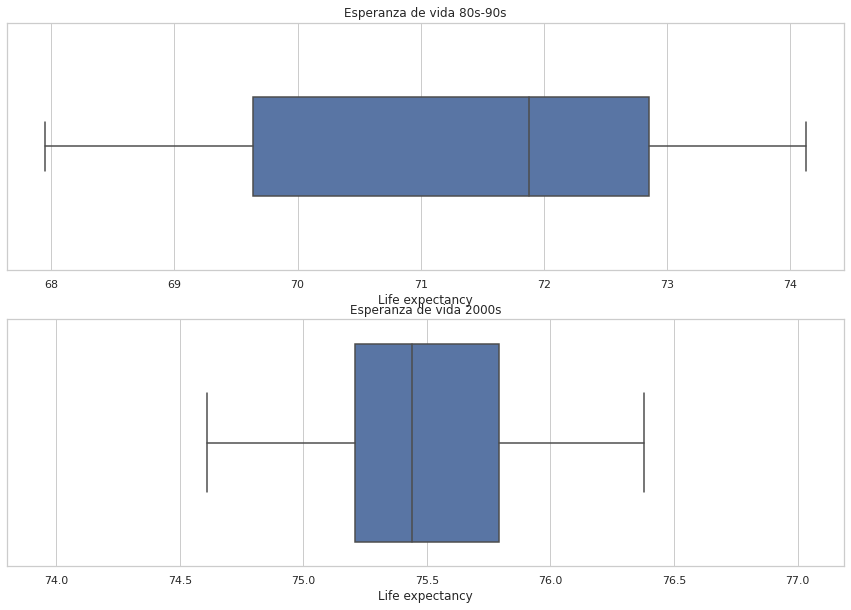

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
sns.boxplot(x=mexico_80_99['Life expectancy'], ax = axes[0])
axes[0].set_title('Esperanza de vida 80s-90s')
axes[0].axis('equal')

sns.boxplot(x=mexico_2000['Life expectancy'], ax = axes[1])
axes[1].set_title('Esperanza de vida 2000s')
axes[1].axis('equal');


### Comparación entre dos muestras de distintas poblaciones

In [ ]:
espana = df[(df['Entity'] == 'Spain') & (df['Year'] >= 1980)].reset_index(drop=True)
espana.head()


,Entity,Year,Life expectancy
0,Spain,1980,75.599998
1,Spain,1981,75.739998
2,Spain,1982,76.300003
3,Spain,1983,76.080002
4,Spain,1984,76.459999


In [ ]:
mexico = df[(df['Entity'] == 'Mexico') & (df['Year'] >= 1980)].reset_index(drop=True)
mexico.head()


,Entity,Year,Life expectancy
0,Mexico,1980,66.563004
1,Mexico,1981,67.041000
2,Mexico,1982,67.502998
3,Mexico,1983,67.950996
4,Mexico,1984,68.387001


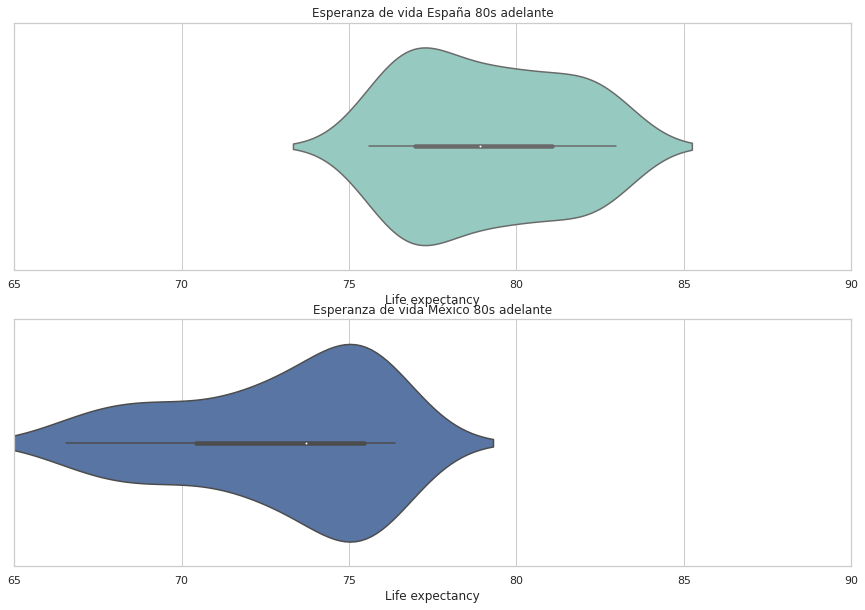

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

sns.violinplot(x=espana['Life expectancy'], ax=axes[0], palette='Set3',  plot_kws=dict(alpha=0.1))
axes[0].set_title('Esperanza de vida España 80s adelante')
axes[0].set_xlim([65, 90])

sns.violinplot(x=mexico['Life expectancy'], ax=axes[1], plot_kws=dict(alpha=0.1))
axes[1].set_title('Esperanza de vida México 80s adelante')
axes[1].set_xlim([65, 90]);